# Chapter 9. 데이터 분석 프로젝트(한국인의 삶 파악하기)
- Koweps_hpwc14_2019_beta2.sav 파일 ~ SPSS 파일
    - SPSS 전용 파일의 경우 어떻게 주피터 노트북에서 불러올 수 있을까?
        1) 아나콘다 프롬프트 환경에서 ‘pip install pyreadstat’를 실행하여 pyreadstat 패키지를 설치한다.
        2) 주피터 노트북을 열고 import pandas 를 실행하여 패키지를 로드한다.
        3) pd.read_spss()를 이용해 SPSS 파일을 불러온다.

 - 코드북: 규모가 큰 조사 자료에서 데이터의 특징(변수명과 값의 의미)을 설명해놓은 파일

 - 변수 타입 출력(변수타입: welfare[‘sex’].dtypes         ← 어트리뷰트이므로 괄호를 쓰면 안돼!
 - 빈도 구하기   : welfare[‘sex’].value_counts()  ← 메서드
 - np.where()
 - histplot의 bins: 구간의 갯수
 - 237p에서 np.where()나 np.nan에 빈칸
     - np.where()의 조건절에는 따옴표('')를 쓰지 말아야 함!
 - groupby를 할 때 as_index가 True일 때와 False일 때의 결과 차이
 - order 빈칸(242~243p): 순서대로 출력 order=[]
 - 247p의 그래프를 보고 결과를 해석하시오.
 - 253p에서 set을 쓰는 이유
 - 263p에서 normalize가 True(비율, proportion), False의 차이(빈도, count), round() 함수
 - 268p에서 색이 다르게 됐을 때 hue 라는 파라미터를 써야하는 것을 적는 빈칸
 - 271p
 - 273p ~ 피벗 구하기, 274p 하나의 막대에 누적할 때 stacked=True

### 데이터 분석 준비하기

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns

In [199]:
raw_welfare = pd.read_spss('../Data/Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()

In [200]:
welfare.head().T

,0,1,2,3,4
h14_id,2.0,3.0,4.0,6.0,6.0
h14_ind,1.0,1.0,1.0,1.0,1.0
h14_sn,1.0,1.0,1.0,1.0,1.0
h14_merkey,20101.0,30101.0,40101.0,60101.0,60101.0
h_new,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
h14_pers_income1,NaN,NaN,NaN,2304.0,NaN
h14_pers_income2,NaN,NaN,1284.0,NaN,NaN
h14_pers_income3,NaN,NaN,NaN,1800.0,NaN
h14_pers_income4,0.0,0.0,0.0,0.0,0.0


In [201]:
welfare.shape

(14418, 830)

In [202]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [203]:
welfare.describe()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [204]:
welfare = welfare.rename(
    columns = {
        'h14_g3': 'sex', # 성별
        'h14_g4': 'birth', # 출생일
        'h14_g10': 'marriage_type', # 혼인 상태
        'h14_g11': 'religion', # 종교
        'p1402_8aq1': 'income', # 월급
        'h14_eco9': 'code_job', # 직업 코드
        'h14_reg7': 'code_region' # 지역 코드
    })

## 2. 성별에 따른 월급 차이
- Q. 성별에 따라 월급이 다를까?

- 분석 절차
    - 1단계: 변수 검토 및 전처리(성별, 월급) ~ df.value_counts() 활용 후, sns.countplot()을 이용하여 빈도 막대 그래프를 그려서 분포 확인
        - 전처리는 이상치를 결측 처리하고, np.where()로 성별 항목에 숫자가 아니라 성별 이름을 부여
    - 2단계: 변수 간 관계 분석(성별에 따른 월급 평균표 만들기), 막대 그래프 만들기(barplot)

### 성별 변수 검토 및 전처리하기

In [205]:
welfare['sex'].dtypes # 변수 타입 출력 ~ float64는 실수 타입

dtype('float64')

In [206]:
welfare['sex'].value_counts() # 1은 남자, 2는 여자 / 9는 모름 또는 무응답

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [207]:
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])
# 성별은 1 또는 2 값이어야 하는데, 9는 이상치이므로 welfare['sex']가 9라면 np.nan으로 결측값으로 대체하고 아니라면 그대로 둠

# 결측치 확인
welfare['sex'].isna().sum()

0

In [208]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
# sex 속성값이 1이면 남자(male), 2라면 여자(female)로 값을 바꿈

# 빈도 구하기
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

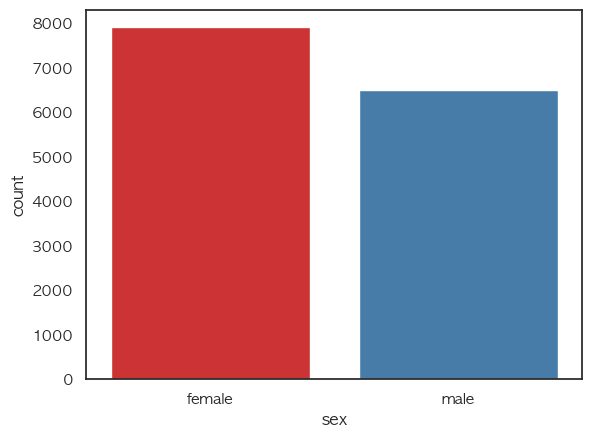

In [209]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x='sex') # 빈도 막대 그래프인 countplot()은 y축 데이터를 설정하지 않음

In [210]:
# 변수 검토하기
welfare['income'].dtypes # 변수 타입 확인

dtype('float64')

In [211]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

### 월급 변수 검토 및 전처리하기

In [212]:
welfare['income'].dtypes
# 앞서 확인한 성별은 범주 변수이므로 df.value_counts()를 이용해 범주별 빈도를 확인하면 특징을 파악할 수 있었음
# 하지만 월급은 연속 변수이므로 위와 같이 확인하면 너무 많은 항목이 출력되므로 df.describe()로 요약 통계량을 확인해야 특징을 파악할 수 있음
# 정리
# 범주 변수: df.value_counts()로 특징 파악
# 연속 변수: df.describe()로 특징 파악

dtype('float64')

In [213]:
welfare['income'].describe()
# 총 4534개의 행이 있으며 평균은 268만원, 편차는 198만원이다. 하위 25%는 150만원, 중앙값은 220만원(평균보다 낮음), 하위 75%는 345만원
# 최대값은 1892만원이다.

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

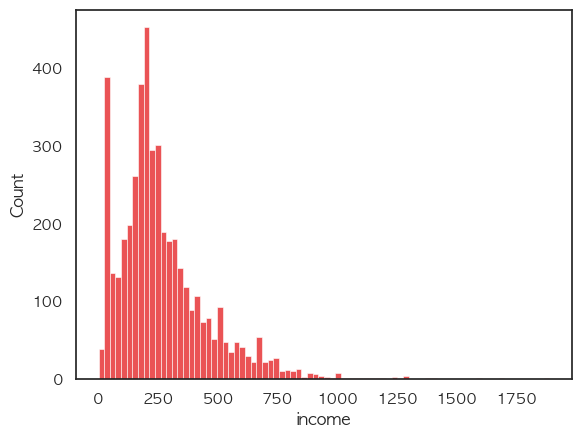

In [214]:
sns.histplot(data = welfare, x='income') # 히스토그램으로 그려서 분포를 확인하기

In [215]:
welfare['income'].isna().sum()

9884

In [216]:
print(f"income 변수의 missing value: {welfare['income'].isna().sum()/len(welfare)*100:.2f}%")

income 변수의 missing value: 68.55%


In [217]:
# 이상치 결측 처리
# 코드북을 확인하면 모름/무응답은 9999로 코딩되어 있음
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
print(welfare['income'].isna().sum())
print(f"income 변수의 missing value: {welfare['income'].isna().sum()/len(welfare)*100:.2f}%")
# 이상치는 없다는 것을 확인 그러나 여전히 결측치는 많이 존재

9884
income 변수의 missing value: 68.55%


### 성별에 따른 월급 차이 분석하기

In [218]:
# dropna(subset = ['속성'])를 이용하여 결측치 제거
# 그리고 성별에 따른 월급 차이를 분석해야 하므로 남녀를 그룹으로 묶어 월급의 평균을 구해야 함
# 따라서 groupby('sex', as_index = False).agg(mean_income = ('income', 'mean'))을 해줘야 함
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

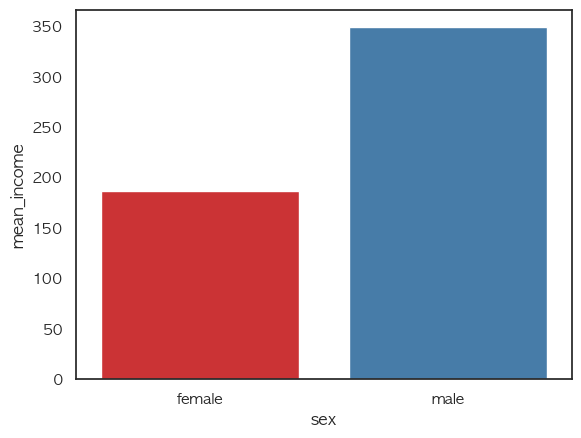

In [219]:
# 위 분석 결과를 쉽게 파악하기 위해 평균 막대 그래프 barplot을 그려서 확인
# data는 sex_income이며 x축은 sex, y축은 mean_income이 오면 됨
sns.barplot(data = sex_income, x='sex', y='mean_income')

## 3. 나이와 월급의 관계
- Q. 몇 살 때 월급을 가장 많이 받을까?

- 분석 절차
    - 1단계: 변수 검토 및 전처리(나이, 월급) ~ df.describe() 활용 후, sns.histplot()을 이용하여 히스토그램 그려서 분포 확인
    - 2단계: 변수 간 관계 분석(나이에 따른 월급 평균표 만들기), 그래프 만들기(lineplot)
        - lineplot을 쓴다는 것에 주의하자! 왜냐하면 groupby('age')만 하고 as_index=False를 안하므로 x축에 나이가 그대로 들어오는데 barplot을 쓰면 너무 많아짐

### 나이 변수 검토 및 전처리하기

In [220]:
welfare['birth'].dtypes # 변수 타입 출력

dtype('float64')

In [221]:
welfare['birth'].describe() # 나이 변수는 없고 태어난 년도(출생년도)만 주어짐
# 총 14418개의 행이 있고 평균 1969년에 출생, 가장 빠른 출생년도는 1907년도, 하위 25%는 1948년도 출생, 중앙값은 1968년도 출생
# 하위 75%는 1990년도 출생, 가장 최근은 2018년 출생

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

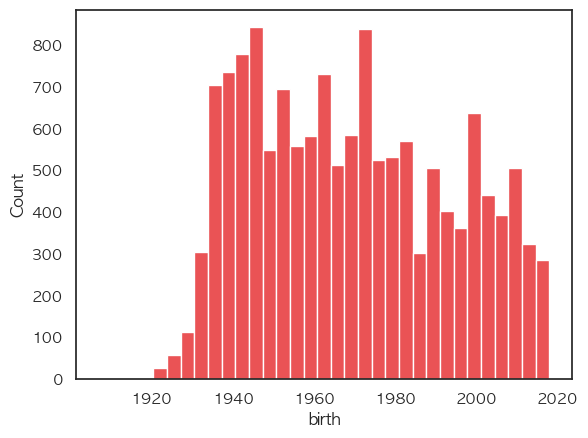

In [222]:
sns.histplot(data = welfare, x='birth')

In [223]:
welfare['birth'].isna().sum() # 결측치 확인

0

In [224]:
# 이상치 결측 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])
# 모름/무응답일 경우 9999로 되어 있음. 따라서 9999인 경우 이상치이므로 결측 처리

# 결측치 확인
welfare['birth'].isna().sum() # 0이므로 이상치가 없다는 것을 확인

0

In [225]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
# 현재는 2023년이지만 2019에서 빼는 이유는 해당 welfare 데이터가 2019년에 조사가 진행됐기 때문임.
# 만약, 2019년에 조사된 데이터가 아니라 올해 조사된 데이터라면 2023 - welfare['birth'] + 1로 해야 함.
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

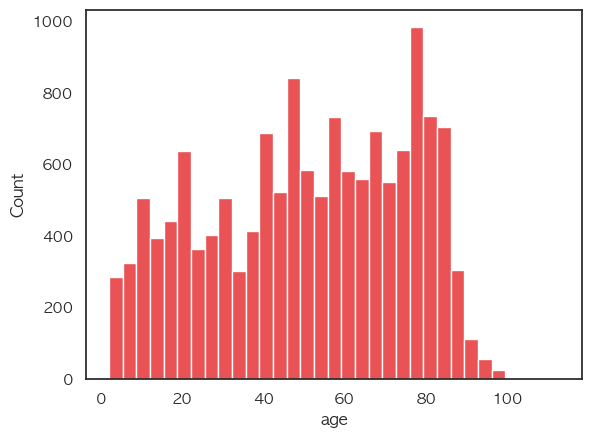

In [226]:
sns.histplot(data=welfare, x='age')

### 나이와 월급의 관계 분석하기

In [227]:
# 나이별 월급 분포표를 만들어야 함 ~ 중요, groupby 후 as_index를 안쓴다는 것에 주의하라!
# 왜냐하면 나이 자체가 x축이 되어야하기 때문이다
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<Axes: xlabel='age', ylabel='mean_income'>

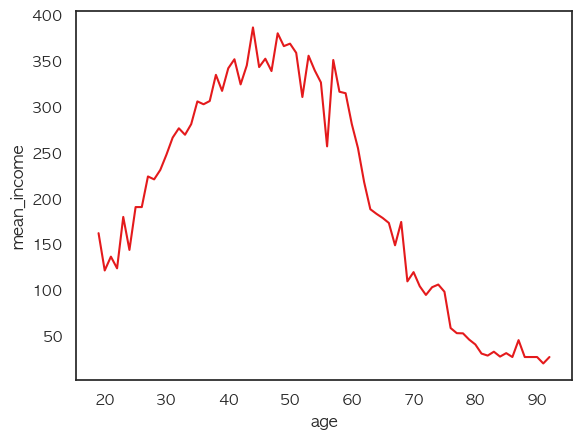

In [228]:
sns.lineplot(data=age_income, x='age', y='mean_income')
# 그래프 해석
# 20대 초반에 월급을 150만 원가량 받고 지속해서 증가하는 추세를 보임
# 그중에서 40대가 350만 원가량으로 가장 많이 받고 지속해서 감소하다가 60대 중후반부터는 20대보다 낮은 월급을 받음

## 4. 연령대에 따른 월급 차이
- Q. 어떤 연령대의 월급이 가장 많을까?

- 분석 절차
    - 1단계: 변수 검토 및 전처리(연령대, 월급) ~ 나이 변수(age)를 이용해 연령대 파생변수(ageg) 만든 후, sns.countplot()을 이용하여 빈도 막대 그래프 그려서 분포 확인
    - 2단계: 변수 간 관계 분석(연령대에 따른 월급 평균표 만들기), 그래프 만들기(barplot)

### 연령대 변수 검토 및 전처리하기

In [229]:
# 나이 변수를 이용해 연령대 파생변수 만들기
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [230]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] < 60, 'middle', 'old')))

# 나이가 30세 미만이면 young, 30세 이상이면서 60세 미만은 middle, 60세 이상은 old를 부여

welfare['ageg'].value_counts() # 파생 변수를 만들고 난 후 범주별 빈도를 확인한다.

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

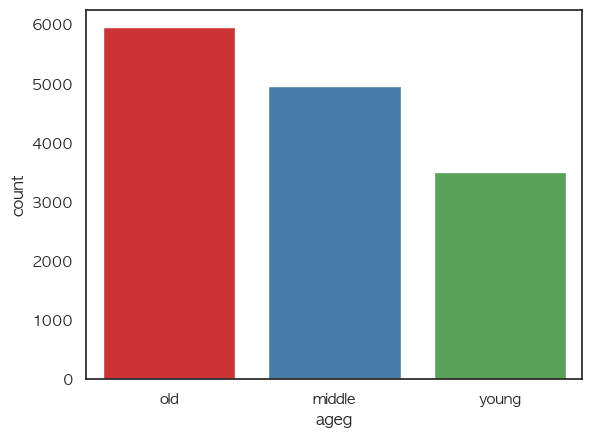

In [231]:
sns.countplot(data = welfare, x='ageg') # countplot으로 범주별 빈도를 더 쉽게 파악한다.

<Axes: xlabel='ageg', ylabel='count'>

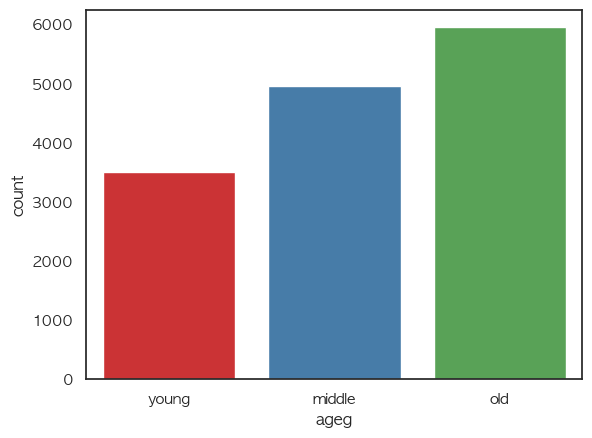

In [232]:
sns.countplot(data = welfare, x='ageg', order=['young', 'middle', 'old'])
# countplot 속성에 order=['속성명1', '속성명2', '속성명3']과 같이 넣어주면 order에 있는 순서대로 x축이 재정렬된다.

### 연령대에 따른 월급 차이 분석하기

In [233]:
# 연령대별 월급 평균표가 필요하다.
# 먼저, 월급 결측치를 제거하고 연령대별로 그룹을 묶어서 각 범주별 income을 ageg_income 변수에 할당하면 된다.
# 이때 age 변수와는 다르게 해당 변수는 연령대 자체가 barplot의 x축 값이 되므로 groupby()에 as_index=False를 해야 한다.
ageg_income = welfare.dropna(subset=['income']) \
                     .groupby('ageg', as_index=False) \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<Axes: xlabel='ageg', ylabel='mean_income'>

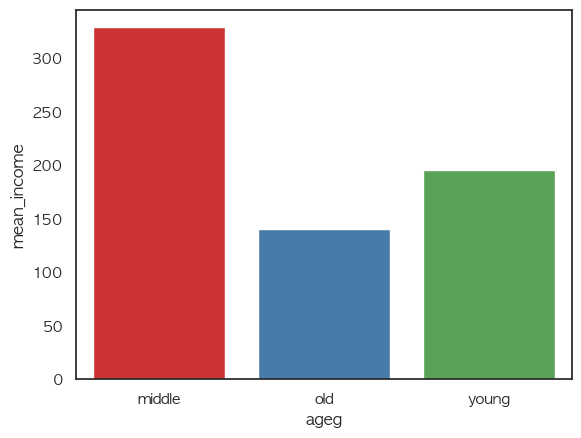

In [234]:
# 아래와 같이 그냥 쓰면 ageg 이름 오름차순(알파벳순)으로 정렬된 상태로 막대 그래프가 출력된다.
sns.barplot(data=ageg_income, x='ageg', y='mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

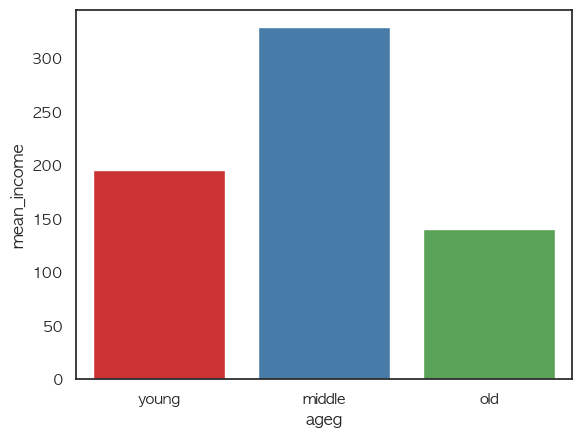

In [235]:
# 막대를 young, middle, old 순서로 정렬한다.
sns.barplot(data=ageg_income, x='ageg', y='mean_income', order=['young', 'middle', 'old'])

# 그래프 해석
# 초년층은 약 200만 원의 월급을 받고 중년층은 월급을 330만 원 정도로 가장 많이 받는다. 그리고 노년층의 월급은 초년층보다 적은 150만 원가량 받는다.

## 5. 연령대 및 성별 월급 차이
- 성별 월급 차이는 연령대별로 다를까?

- 분석 절차
    - 1단계: 변수 검토 및 전처리(연령대, 성별, 월급) ~ 연령대 및 성별에 따른 월급 평균표를 만든다.(groupby에 ['ageg', 'sex']가 들어가야 함)
    - 2단계: 변수 간 관계 분석: 그래프 만들기(barplot: 연령대 및 성별에 따른 월급 차이 분석, lineplot: 나이 및 성별에 따른 월급 차이 분석)

### 연령대 및 성별 월급 차이 분석하기

In [236]:
sex_income = \
    welfare.dropna(subset = ['income']) \
           .groupby(['ageg', 'sex'], as_index=False) \
           .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

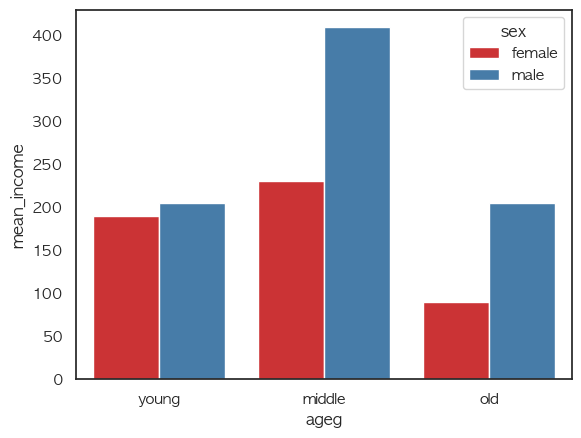

In [237]:
# data는 sex_income, 연령대 및 성별에 따른 월급 평균표다.
# x축에는 연령대가 들어가며 y축에는 각 연령대별 평균 월급이다. 이때 성별에 따라 막대 색을 다르게 표현하고 싶은 경우 hue='sex'를 속성에 추가한다.
sns.barplot(data=sex_income, x='ageg', y='mean_income', hue='sex', order=['young', 'middle', 'old'])
# hue 속성을 사용하지 않으면 연령대(ageg)에 따른 평균 소득(mean_income)만 나타낼 것이다.
# 그러나 hue='sex'를 추가하면 남성과 여성 간의 소득 차이를 보여주게 된다.
# 따라서, hue는 데이터를 분리하여 서로 다른 범주 간의 비교를 가능하게 하는 데 사용된다.

### 나이 및 성별 월급 차이 분석하기

In [238]:
sex_age = welfare.dropna(subset=['income']) \
                 .groupby(['age', 'sex'], as_index=False) \
                 .agg(mean_income = ('income', 'mean'))
# 월급(income) 결측치는 제거하고 ['age', 'sex']로 그룹을 묶는다. 이때, as_index=False
# 다음으로 월급의 평균을 mean_income 파생변수로 만들어준다.
sex_age

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
...,...,...,...
140,89.0,male,27.000000
141,90.0,female,27.000000
142,91.0,female,27.000000
143,91.0,male,13.000000


<Axes: xlabel='age', ylabel='mean_income'>

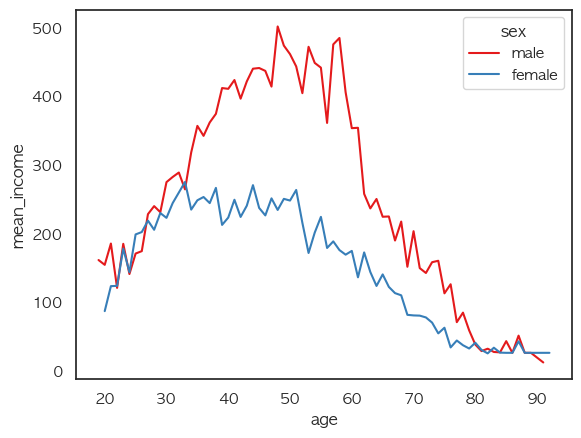

In [239]:
sns.lineplot(data=sex_age, x='age', y='mean_income', hue='sex')
# 선 그래프 또한 성별을 기준으로 다른 색 선으로 표시하고 싶기 때문에 색조(hue) 속성을 추가한다.

# 그래프 해석
# 전반적으로 여성보다는 남성의 월급이 전 연령대에서 많다.
# 또한 남성이 월급은 50세까지 증가하다가 점차 감소하는데 특히 50대 후반부터 급격히 감소한다.
# 여성의 월급은 30세 초반까지 증가하다가 점차 완만하게 감소하는 것을 확인할 수 있다.
# 성별에 따른 월급 격차는 50대에서 가장 크게 벌어지고, 이후 점차 줄어들어 80대가 되면 거의 비슷한 수준이 된다.

In [240]:
sex_age['mean_income'].max()

501.7936507936508

<Axes: xlabel='age', ylabel='Count'>

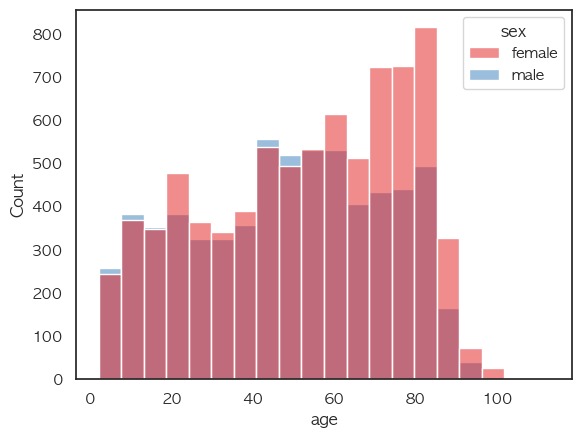

In [245]:
sns.histplot(data=welfare, x='age', hue='sex', bins=20)
# 히스토그램에서의 bins는 해당 분포의 구간을 어떻게 나눌지 정하는 속성이다.
# bins 값을 작게 설정하면 각 구간이 좁아지게 되어 미세한 데이터의 분포를 확인할 수 있다.
# bins 값을 크게 설정하면 각 구간이 넓어져 전체적인 경향성을 확인할 수 있다.
# 하지만 값을 크게 설정한 경우, 세부적인 데이터의 분포는 상대적으로 뚜렷하지 않게 표현될 수 있다

In [242]:
sex_age = welfare.dropna(subset=['income']) \
                 .groupby(['age', 'sex'], as_index=False) \
                 .agg(max_income = ('income', 'max'),
                      min_income = ('income', 'min'))
sex_age = sex_age.assign(diff = sex_age['max_income'] - sex_age['min_income'])
print(sex_age['diff'].max())
sex_age.query("diff == 1742")

1742.0


,age,sex,max_income,min_income,diff
58,48.0,male,1892.0,150.0,1742.0


## 6. 직업별 월급 차이 분석
- 어떤 직업이 월급을 가장 많이 받을까?

- 분석 절차
    - 1단계: 변수 검토 및 전처리(직업, 월급) ~ 직업별 월급 평균표를 만든다.(groupby에 job이 들어가야 함)
    - 2단계: 변수 간 관계 분석: 그래프 만들기(barplot) ~ 평균 월급 상위 10개 직업을 확인할 때는 y축에 job이 들어가야 함

### 직업 변수 검토 및 전처리하기

In [246]:
welfare['code_job'].dtypes # 변수 타입 출력

dtype('float64')

In [247]:
welfare['code_job'].value_counts() # 직업 코드의 빈도 구하기

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [248]:
list_job = pd.read_excel('../Data/Koweps_Codebook_2019.xlsx', sheet_name = 1) # 두번 째 시트를 불러옴
# sheet_name = '직종코드'로 불러올 수도 있다!
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [249]:
list_job.shape

(156, 2)

In [250]:
# df.merge()를 이용해 결합하기, 기준열은 code_job
# welfare의 'code_job' 속성에 대한 모든 값을 기준으로 left inner join을 실시
# welfare에 job 속성이 새로 생기고 code_job에 해당하는 job이 매칭된다.
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [251]:
welfare[['code_job','job']].head() # 위 결과를 확인해볼 수 있음

,code_job,job
0,NaN,NaN
1,NaN,NaN
2,762.0,전기공
3,855.0,금속기계 부품 조립원
4,NaN,NaN


In [252]:
# code_job의 결측치를 제거하고 code_job과 job의 head()를 출력
welfare.dropna(subset = ['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


### 직업별 월급 차이 분석하기

In [253]:
job_income = welfare.dropna(subset = ['job', 'income']) \
                    .groupby('job', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))

# job, income의 결측치를 제거하고 job별로 그룹을 분리한다. 이때, as_index=False여야 한다.
# 다음으로 월급의 평균을 mean_income 파생변수로 추가한다.

job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [254]:
# 월급이 많은 10개 직업
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10 # 직업별 평균 월급 데이터에서 평균 월급을 기준으로 내림차순 정렬을 하고 상위 10개 직업을 추출하여 top10 변수에 할당한다.

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


<Axes: xlabel='mean_income', ylabel='job'>

/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


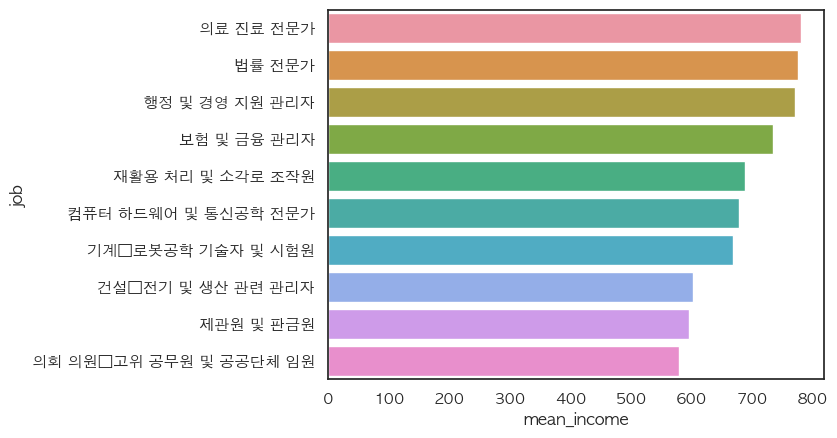

In [255]:
# 위에서 구한 상위 10개 직업을 데이터를 이용하여 x축에 mean_income, y축에 job을 두고 평균 막대 그래프를 그린다.
# y축에 직업(job)을 지정한 이유는 컬럼이 많기 때문에 x축에 두는 것보다 시각적으로 보기 쉽기 때문이다.
# 만약 x축에 직업(job)을 지정한다면 서로 겹쳐서 알아볼 수 없을 것이다.
import matplotlib.pyplot as plt
sns.set(style = "white", palette = "Set1")
plt.rcParams['font.family'] = 'AppleGothic'
sns.barplot(data = top10, y = 'job', x = 'mean_income')

In [256]:
# 하위 직업을 구할 거면 직업별 평균 월급 데이터에서 평균 월급을 오름차순으로 정렬하고 상위 10개를 추출하여 bottom10 변수에 할당한다.
bottom10 = job_income.sort_values('mean_income', ascending = True).head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


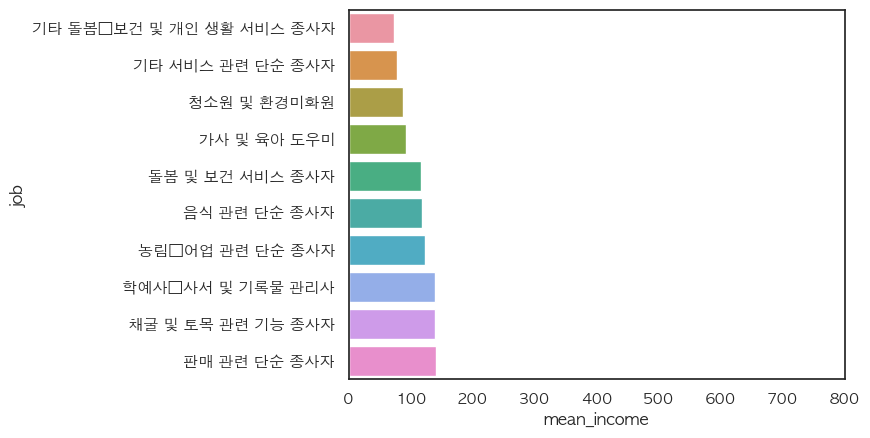

In [257]:
sns.set(style = "white", palette = "Set1")
plt.rcParams['font.family'] = 'AppleGothic'
sns.barplot(data = bottom10, y = 'job', x = 'mean_income').set(xlim = (0,800))

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_75789/3475184209.py:13: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  plt.tight_layout()
/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


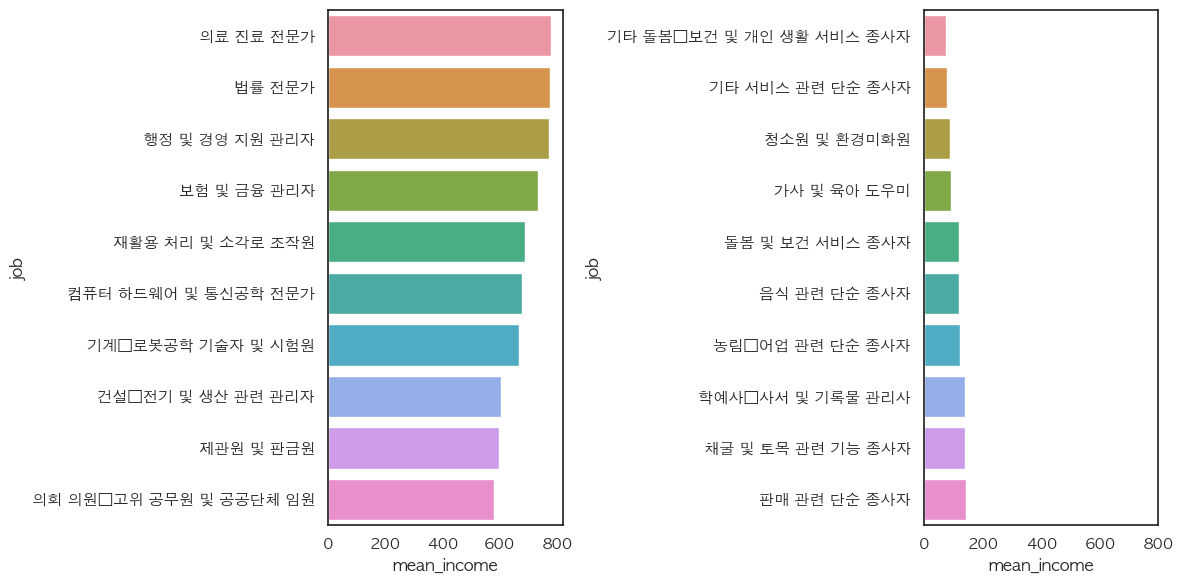

In [258]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.set(style = "white", palette = "Set1")
plt.rcParams['font.family'] = 'AppleGothic'
sns.barplot(data = top10, y = 'job', x = 'mean_income')

plt.subplot(1, 2, 2)
sns.set(style = "white", palette = "Set1")
plt.rcParams['font.family'] = 'AppleGothic'
sns.barplot(data = bottom10, y = 'job', x = 'mean_income').set(xlim = (0,800))


plt.tight_layout()
plt.show()

## 7. 성별 직업 빈도
- 성별로 어떤 직업이 가장 많을까?

- 분석 절차
    - 1단계: 변수 검토 및 전처리(성별, 직업) ~ 성별로 직업별 빈도표를 만든다.
        - 먼저, 직업의 결측치를 제거한다.
        - 만약 남성의 직업 빈도가 궁금하다면 df.query()를 통해 sex == "male"인 행만 추출한다.
        - 다음으로, job별로 그룹을 분리하고 job의 빈도(count)를 구하여 파생변수를 추가한다.
        - 가장 많은 직업이 궁금하면 n을 기준으로 내림차순 정렬을 하고 상위 10개 직업이 궁금하면 head() 함수를 이용해서 10개만 추출한다.
    - 2단계: 변수 간 관계 분석: 그래프 만들기(barplot) ~ 이때도 직업의 수가 많으므로 x축이 아닌 y축에 직업을 지정한다.

In [259]:
# 남성 상위 10개 직업 빈도표 만들기
job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


[(0.0, 500.0)]

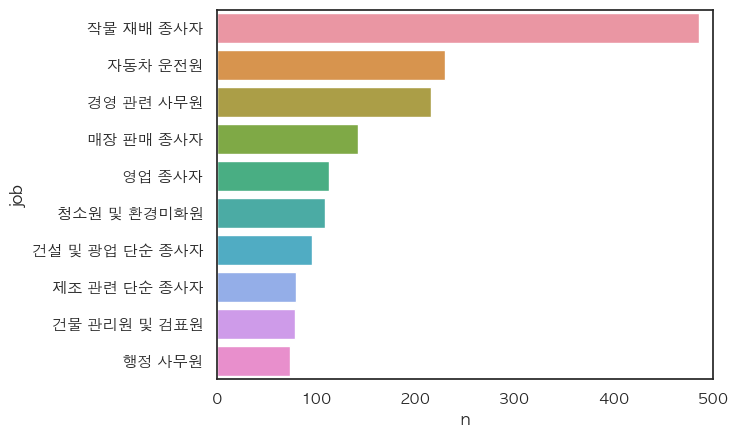

In [260]:
# 남성 상위 10개 직업 빈도 막대 그래프 만들기
sns.barplot(data=job_male, y='job', x='n').set(xlim=(0, 500))

In [261]:
# 여성 상위 10개 직업 빈도표 만들기
job_female = welfare.dropna(subset = ['job']) \
                  .query('sex == "female"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

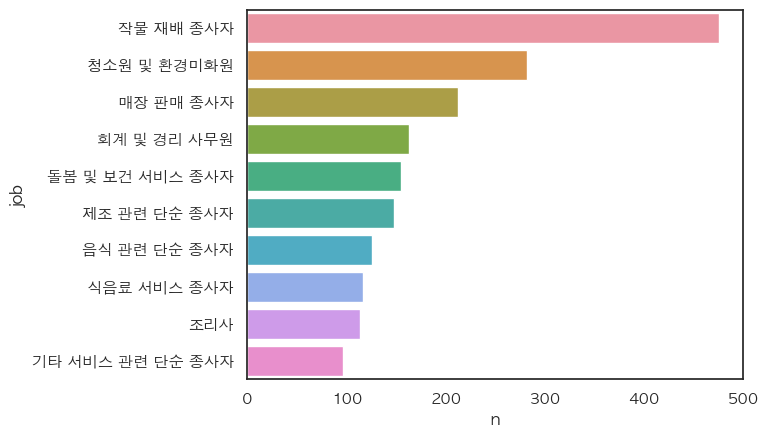

In [262]:
# 여성 상위 10개 직업 빈도 막대 그래프 만들기
sns.barplot(data=job_female, y='job', x='n').set(xlim=(0, 500))

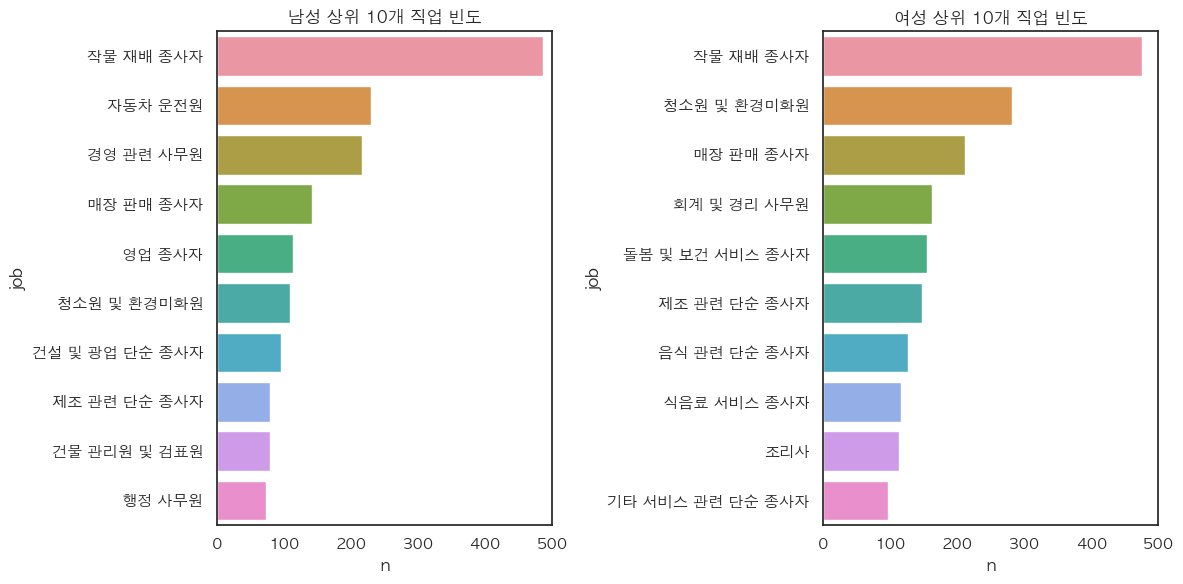

In [263]:
# 남성 및 여성 상위 10개 직업
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('남성 상위 10개 직업 빈도')
sns.barplot(data=job_male, y='job', x='n').set(xlim=(0, 500))

plt.subplot(1, 2, 2)
plt.title('여성 상위 10개 직업 빈도')
sns.barplot(data=job_female, y='job', x='n').set(xlim=(0, 500))

plt.tight_layout()
plt.show()

In [264]:
# 남성 하위 10개 직업 빈도표 만들기
job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index=False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending=True) \
                  .head(10)
job_male

,job,n
0,가사 및 육아 도우미,1
142,혼례 및 장례 종사자,1
139,학예사∙사서 및 기록물 관리사,1
132,통계 관련 사무원,1
126,철도운송 관련 종사자,1
51,문화∙예술 관련 기획자 및 매니저,1
54,발전 및 배전장치 조작원,1
87,연구∙교육 및 법률 관련 관리자,2
21,금융 및 보험 전문가,2
95,음료제조관련기계조작원,2


[(0.0, 10.0)]

/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


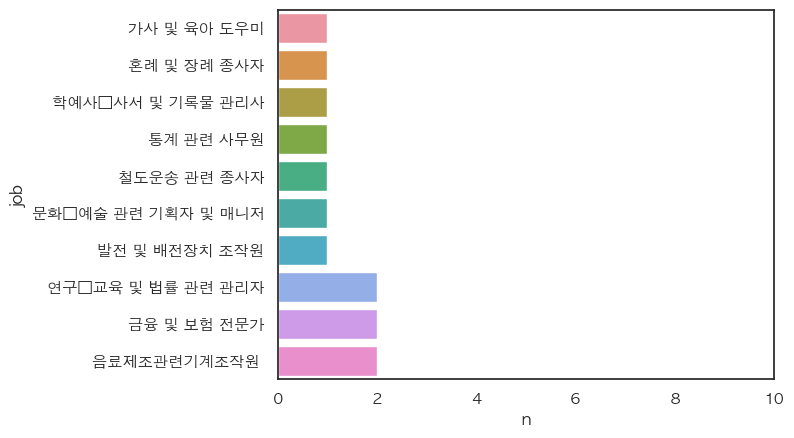

In [265]:
# 남성 하위 10개 직업 빈도 막대 그래프 만들기
sns.barplot(data=job_male, y='job', x='n').set(xlim=(0, 10))

In [266]:
# 여성 하위 10개 직업 빈도표 만들기
job_female = welfare.dropna(subset = ['job']) \
                  .query('sex == "female"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = True) \
                  .head(10)
job_female

,job,n
95,통계 관련 사무원,1
21,기타 기계 조작원,1
86,정보 시스템 및 웹 운영자,1
25,기타 식품가공 관련 기계 조작원,1
26,기타 전문 서비스 관리자,1
84,전기∙전자 부품 및 제품 제조 장치 조작원,1
34,목재∙가구∙악기 및 간판 관련 기능 종사자,1
36,문화∙예술 관련 관리자,1
79,임업 관련 종사자,1
45,부사관,1


[(0.0, 10.0)]

/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


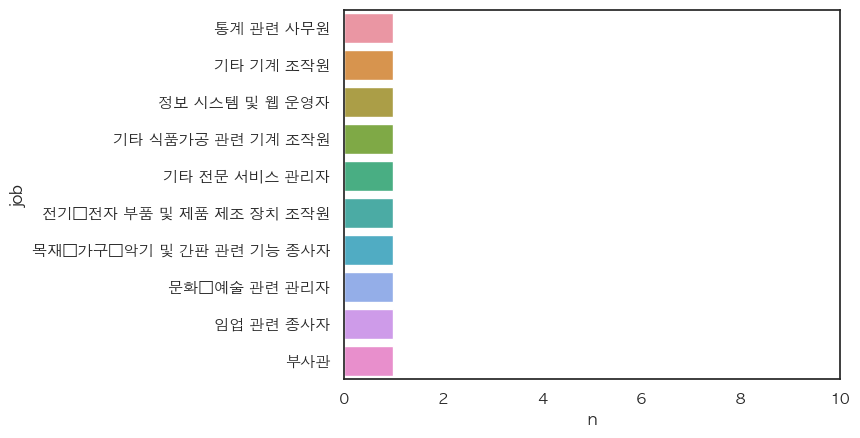

In [267]:
# 여성 하위 10개 직업 빈도 막대 그래프 만들기
sns.barplot(data=job_female, y='job', x='n').set(xlim=(0, 10))

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_75789/1407471628.py:10: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  plt.tight_layout()
/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


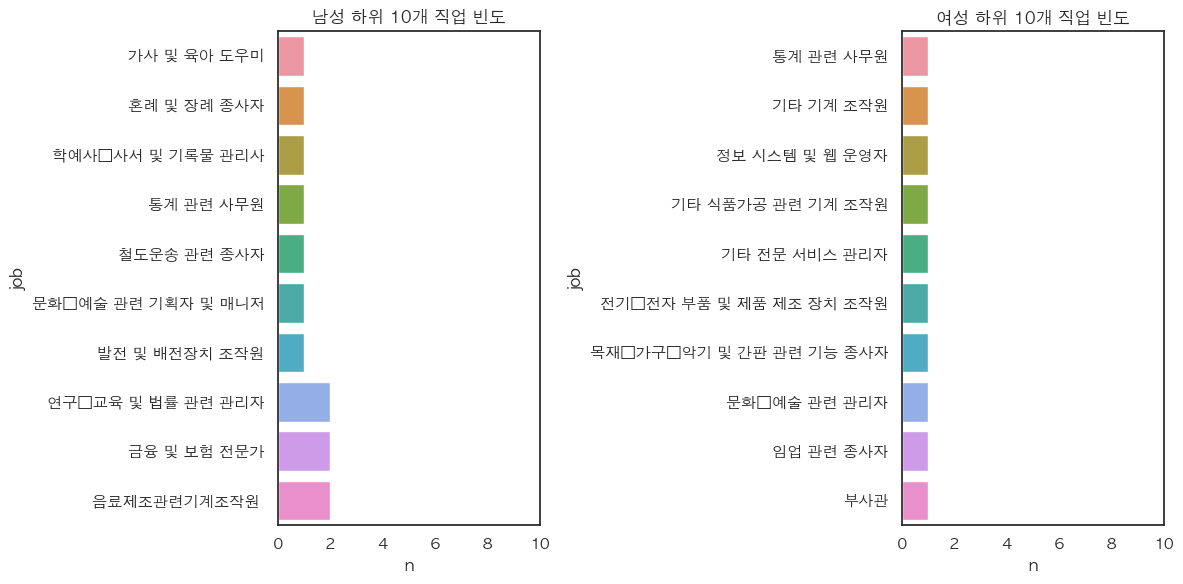

In [268]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('남성 하위 10개 직업 빈도')
sns.barplot(data=job_male, y='job', x='n').set(xlim=(0, 10))

plt.subplot(1, 2, 2)
plt.title('여성 하위 10개 직업 빈도')
sns.barplot(data=job_female, y='job', x='n').set(xlim=(0, 10))

plt.tight_layout()
plt.show()

## 8. 종교 유무에 따른 이혼율
- 종교가 있으면 이혼을 덜 할까?

- 분석 절차
    - 1단계: 변수 검토 및 전처리(종교, 혼인 상태)
        - 종교 유무에 따라 이름을 부여한다.
        - 혼인 상태 변수를 전처리하여 이혼 여부 변수(marriage)를 파생변수로 만든다.
    - 2단계: 변수 간 관계 분석: 그래프 만들기(barplot)
        - 종교 유무에 따른 이혼율 분석
        - 연령대 및 종교 유무에 따른 이혼율 분석

### 종교 변수 검토 및 전처리하기

In [269]:
welfare['religion'].dtypes # 변수 타입 추출

dtype('float64')

In [270]:
welfare['religion'].value_counts() # 종교 유무의 빈도를 구한다.

# 1: 있음
# 2: 없음
# 9: 모름/무응답
# 1, 2만 있고 9는 없으므로 이상치는 없다. 따라서 이상치를 결측 처리하는 작업은 생략할 수 있음

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [271]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')
# 종교 있으면 yes, 없으면 no으로 종교 유무를 나타낸 문자를 부여
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

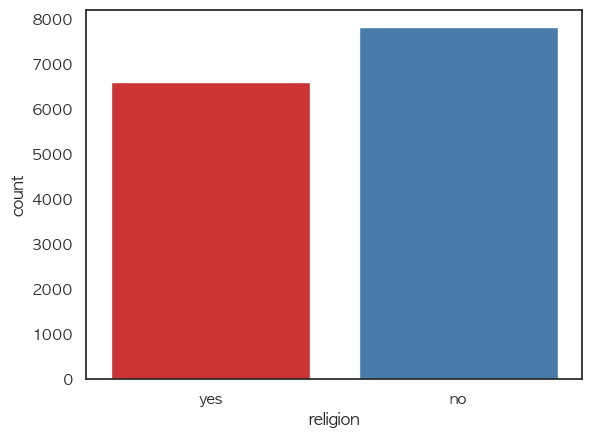

In [273]:
sns.countplot(data=welfare, x='religion') # sns.countplot()을 통해 종교의 유무 빈도를 시각화하여 확인한다.
# 종교가 없는 사람이 종교가 있는 사람보다 약 1000명정도 많다.

### 혼인 상태 변수 검토 및 전처리하기

In [275]:
welfare['marriage_type'].dtypes # 변수 타입 출력

dtype('float64')

In [276]:
welfare['marriage_type'].value_counts()
# 0: 비해당(18세 미만)
# 1: 유배우 ~ 결혼 상태
# 2: 사별
# 3: 이혼
# 4: 별거
# 5: 미혼(18세 이상, 미혼모 포함)
# 6: 기타(사망 등)

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [277]:
# 배우자가 있으면(welfare['marriage_type'] == 1), marriage(결혼)로
# 이혼 상태라면(welfare['marriage_type'] == 3), divorce(이혼)로
# 이외에는 전부 etc(기타)를 부여한다.

welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce',
                                                              'etc'))
# marriage_type이 1이면 결혼(marriage), 3이면 이혼(divorce), 그외에는 etc

In [278]:
# marriage별로 분리하고 각각의 빈도를 구한다.
n_divorce = welfare.groupby('marriage', as_index=False) \
                   .agg(n = ('marriage', 'count')) # 결혼 유무로 그룹화하고 marriage별 빈도 구하기
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

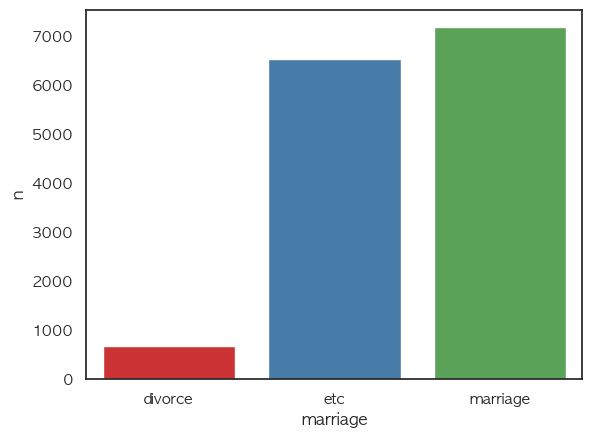

In [283]:
# 막대 그래프 만들기
sns.barplot(data=n_divorce, x='marriage', y='n')

# 그래프 해석
# 배우자가 있는 결혼 상태가 가장 많고, 이혼은 가장 적은 비율이다.
# etc의 경우는 분석 대상이 아니므로 제외해야 함

### 종교 유무에 따른 이혼율 분석하기
- normalize의 유무에 따른 차이 중요하게 볼 것

In [285]:
# 종교 유무에 따른 이혼율표 만들기
# 가장 먼저 'marriage'가 'etc' 경우를 제외해야 하므로 df.query()를 이용하여 구한다.
# 다음으로, 종교(religion)별로 분리하고 각 religion별 marriage와 count를 파생변수로 추가한다.
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False) \
                 ['marriage'] \
                 .value_counts()
rel_div

,religion,marriage,count
0,no,marriage,3660
1,no,divorce,384
2,yes,marriage,3530
3,yes,divorce,305


In [287]:
# 위와 같이 value_counts()만 쓴다면 각각의 빈도를 구한다.
# 하지만 이번엔 이혼율, 즉 비율을 구해야 하므로 value_counts() 안에 normalize(정규화) = True를 해준다.
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
rel_div
# 결과를 확인해보면 파생변수로 count가 아닌, proportion(비율)이 추가된 것을 확인할 수 있다.
# 하지만 현재 소수가 복잡하게 표현되어 있으므로 round() 함수를 이용하여 소수점 첫째 자리까지 반올림하여 출력하도록 하는 것이 보기 편할 것이다.
# round()는 값을 반올림하는 함수로, 출력할 자릿수를 입력하여 사용하면 되는데, 소수점 첫째 자리까지 반올림한다면 round(1)을 입력하면 된다.

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [288]:
# 현재 궁금한 것은 종교의 유무에 따른 이혼율을 분석하는 것이므로 marriage == "divorce"인 것만 파악하면 된다.
# 또한 현재 값은 0.9와 같이 되어있지만 이는 90%를 뜻하는 비율이므로 * 100을 해서 비율을 백분율로 바꿔야 한다.
rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion'] * 100) \
                 .round(1) # 백분율로 바꾸고 소수점 첫째 자리까지 반올림 
rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<Axes: xlabel='religion', ylabel='proportion'>

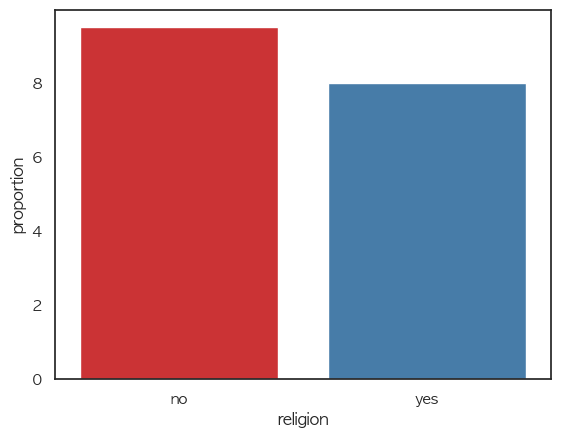

In [290]:
# 마지막으로 rel_div 데이터에 대해 막대 그래프를 그린다.
# x축으로는 religion, y축은 proportion을 지정한다.
sns.barplot(data = rel_div, x='religion', y='proportion')

# 그래프 해석
# 종교가 없으면 이혼율이 더 높다고 해석할 수 있다.
# 반면에, 종교가 있다면 이혼을 덜 한다고 해석할 수 있다.

### 연령대 및 종교 유무에 따른 이혼율 분석하기

In [291]:
# 위에서 종교 유무에 따른 이혼율을 분석했다면, 이번에는 연령대를 추가해서 함께 분석하고자 한다.
# 먼저 연령대별 이혼율의 차이를 확인하고자 한다면,
# marriage가 "etc"인 행을 제외하고 ageg(연령대)별로 분리하여 marriage와 proportion을 파생변수로 추가한다.
# proportion(비율)은 앞과 동일하게 value_counts(normalize = True)로 구할 수 있다.

age_div = welfare.query('marriage != "etc"') \
                 .groupby('ageg', as_index=False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
age_div

# 결과 해석
# 연령대별 이혼율은 중년층이 가장 높으며 초년층이 가장 낮다.

,ageg,marriage,proportion
0,middle,marriage,0.910302
1,middle,divorce,0.089698
2,old,marriage,0.914220
3,old,divorce,0.085780
4,young,marriage,0.950000
5,young,divorce,0.050000


In [292]:
# 그런데 위와 같이 비율이 아닌 빈도(count)를 구해보면,
# 초년층은 이혼뿐만 아니라 이혼 사례도 적기 때문에 다른 연령대와 비교하기에 적합하지 않으므로 분석 작업에서 제외하는 것이 좋다.

welfare.query('marriage != "etc"') \
       .groupby('ageg', as_index=False) \
       ['marriage'] \
       .value_counts()

,ageg,marriage,count
0,middle,marriage,3552
1,middle,divorce,350
2,old,marriage,3581
3,old,divorce,336
4,young,marriage,57
5,young,divorce,3


In [293]:
# young(초년층)을 제외한 middle(중년층)과 old(노년층) 중 marriage == "divorce"인 행만 추출한다.
# 다음으로 proportion 값을 age_div['proportion'] * 100을 하여 구한 백분율 값을 assign() 함수를 이용하여 파생변수로 추가한다.
# 마지막으로 round() 함수에 1을 넣어 소수점 첫째 자리까지 반올림한다. 이렇게 구한 값들을 age_div 변수에 할당한다.

age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) \
                 .round(1)
age_div

,ageg,marriage,proportion
1,middle,divorce,9.0
3,old,divorce,8.6


<Axes: xlabel='ageg', ylabel='proportion'>

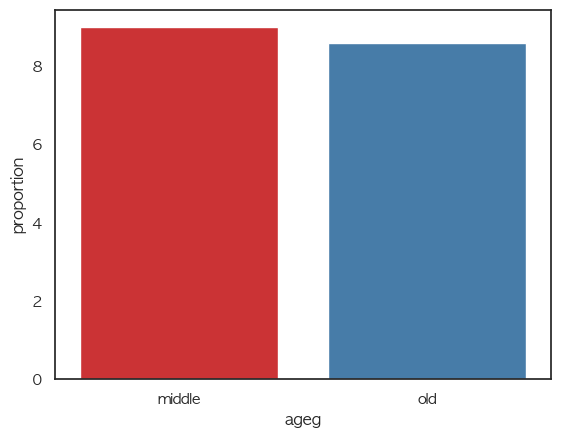

In [296]:
# 막대 그래프 만들기
sns.barplot(data = age_div, x='ageg', y='proportion')

# 그래프 해석
# 중년층의 이혼율이 더 높고 노년층의 이혼율이 다음으로 높다.
# 중년층의 경우 약 9% 정도의 이혼율을 보이고, 노년층의 경우 약 8%의 이혼율을 보인다.

### 연령대 및 종교 유무에 따른 이혼율 분석하기

In [297]:
# 위에서 연령대에 따른 이혼율 차이를 확인했다. 추가적으로, 연령대 및 종교 유무에 따른 이혼 여부별 비율의 차이를 확인해보고자 한다.
# 이때도 marriage가 etc(기타)인 행과 ageg가 young(초년층)인 행은 제외한다.
# 다음으로, groupby()를 통해 ageg(연령대)와 religion(종교)를 묶어 이를 기준으로 분리한다.
# 그리고 각 marriage별 비율(proportion)을 구한다. ex: ['marriage'].value_counts(normalize = True)

age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)
age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.904953
1,middle,no,divorce,0.095047
2,middle,yes,marriage,0.917520
3,middle,yes,divorce,0.082480
4,old,no,marriage,0.904382
5,old,no,divorce,0.095618
6,old,yes,marriage,0.922222
7,old,yes,divorce,0.077778


In [298]:
# 위에서 구한 표 중에서 이혼율만 필요하므로 marriage == "divorce"인 행만 추출하고 proportion에 100을 곱하여 파생변수를 추가한다.
# 이때도 round(1)을 해주어 소수점 첫째 자리까지 반올림한다.

age_rel_div = age_rel_div.query('marriage == "divorce"') \
                     .assign(proportion = age_rel_div['proportion'] * 100) \
                     .round(1)
age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,9.5
3,middle,yes,divorce,8.2
5,old,no,divorce,9.6
7,old,yes,divorce,7.8


<Axes: xlabel='ageg', ylabel='proportion'>

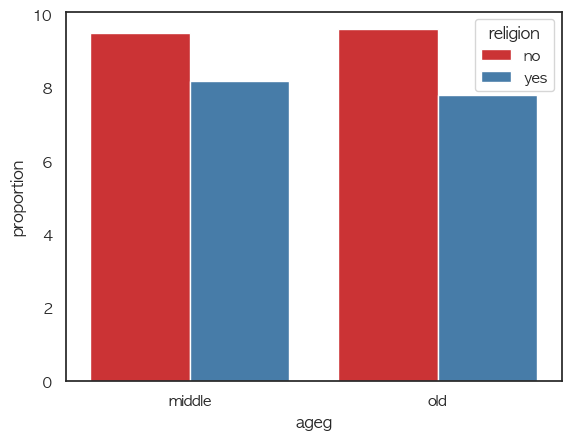

In [299]:
# 위에서 구한 데이터를 통해 x축에 ageg(연령대), y축에 proportion(이혼율)을 지정하여 막대 그래프를 그린다.
# 이때 종교 유무별로 색을 다르게 지정해야 하므로 hue='religion'을 속성에 추가한다.

sns.barplot(data = age_rel_div, x='ageg', y='proportion', hue='religion')

## 9. 지역별 연령대 비율
- 어느 지역에 노년층이 많을까?


- 분석 절차
    - 1단계: 변수 검토 및 전처리(지역, 연령대)
        - 지역 변수를 검토하고 전처리
    - 2단계: 변수 간 관계 분석: 그래프 만들기(barplot)
        - 지역별 연령대 비율표 만들기
            - df.pivot()가 무엇인지 알아야 함
        - 그래프 만들기
            - df.plot.barh()가 무엇인지 알아야 함
            - df.plot.barh(stacked = True)를 한 경우 어떻게 출력되는지 알아야 함
            - 

In [300]:
welfare['code_region'].dtypes # 변수 타입 출력

dtype('float64')

In [301]:
welfare['code_region'].value_counts() # 지역 코드별 빈도 구하기
# 지역 코드별 지역명을 나타낸 지역 코드 목록을 만들어 df.merge()를 이용하여 left inner join 해야 할 것 같은 느낌을 이때 받아야 함.

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [302]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region': [1, 2, 3, 4, 5, 6, 7],
                            'region': ['서울',
                                       '수도권(인천/경기)',
                                       '부산/경남/울산',
                                       '대구/경북',
                                       '대전/충남',
                                       '강원/충북',
                                       '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [303]:
# welfare 데이터와 위에서 만든 list_region 데이터를 'code_region'을 기준으로 left inner join을 진행한다.(합병: merge)
welfare = welfare.merge(list_region, how='left', on='code_region')

welfare[['code_region', 'region']].head() # code_region별로 region이 잘 지정되었는지 상위 5개 데이터를 읽어봄으로써 확인하자.

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


### 지역별 연령대 비율 분석하기

In [359]:
# 먼저, 지역별로 연령대 빈도를 해보자.
# 연령대 빈도 = ['ageg'].value_counts(normalize = True)
region_ageg = welfare.groupby('region', as_index=False) \
                     ['ageg'] \
                     .value_counts()
region_ageg

# 하지만 본 파트에서는 비율을 구해야 하므로 value_counts()에 normalize = True 속성을 추가해야 한다.

,region,ageg,count
0,강원/충북,old,522
1,강원/충북,middle,351
2,강원/충북,young,264
3,광주/전남/전북/제주도,old,1108
4,광주/전남/전북/제주도,middle,784
5,광주/전남/전북/제주도,young,574
6,대구/경북,old,871
7,대구/경북,middle,512
8,대구/경북,young,345
9,대전/충남,old,575


In [304]:
# 지역 및 연령대별 비율표를 만들면 아래와 같다.
# 이제, 앞의 작업들에서 여러 번의 반복을 통해 proportion에 100을 곱한 값을 assing()을 통해 파생변수로 추가하고,
# round(1)을 해주어 소수점 첫째 자리까지 반올림하여야 할 것 같다는 느낌이 들어야 한다.
region_ageg = welfare.groupby('region', as_index=False) \
                     ['ageg'] \
                     .value_counts(normalize = True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/전북/제주도,old,0.449311
4,광주/전남/전북/제주도,middle,0.317924
5,광주/전남/전북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


In [361]:
# proportion을 백분율로 바꾸고 소수점 첫째 짜리까지 반올림하면 다음과 같다.
region_ageg = \
    region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
               .round(1)

region_ageg

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


<Axes: xlabel='proportion', ylabel='region'>

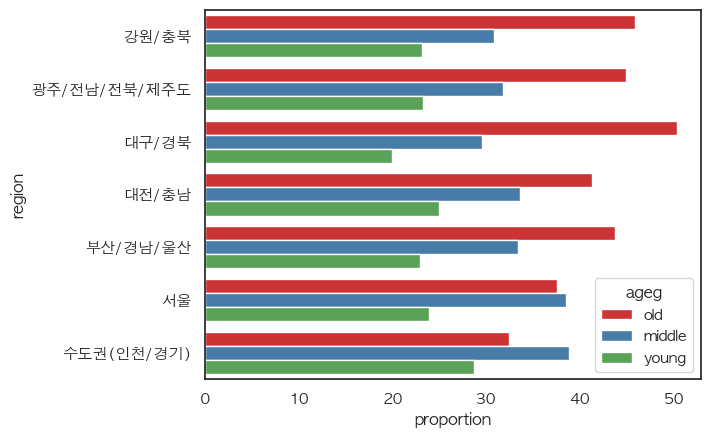

In [362]:
# 막대 그래프 만들기
# 지역 및 연령대별 백분율 데이터를 활용하여 x축은 비율, y축은 지역을 지정하고 연령대별로 다른 색으로 표현하기 위해 hue는 ageg를 지정한다.
sns.barplot(data = region_ageg, y='region', x='proportion', hue='ageg')

# 그런데, 결과를 보면 한눈에 잘 들어오지 않는다. 따라서 누적 비율 막대 그래프를 이용해보자.
# 이를 위해서 피벗을 해주어야 한다.

#### 피벗
- 피벗: 행과 열을 회전해 표의 구성을 바꾸는 작업
    - 누적 막대 그래프를 만드는 데 적합하도록 기존 데이터 프레임의 행과 열을 회전해 구성을 바꾸는 작업이 필요한데 이때, 피벗한다고 한다.
    - df.pivot()을 이용하면 된다. 해당 함수안에는 다음과 같은 속성이 들어간다.
        - index: 회전의 기준 속성명
        - columns: 열을 구성하는 속성명
        - values: 행을 구성하는 속성명

In [308]:
# 피벗 전 결과
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/전북/제주도,old,0.449311
4,광주/전남/전북/제주도,middle,0.317924
5,광주/전남/전북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


In [311]:
# 피벗의 개념을 적용하여 데이터 프레임을 피벗하면 다음과 같다.
# 지역 및 연령대별 데이터 프레임 중에서 지역, 연령대, 백분율 변수만을 추출하고 df.pivot()을 통해 피벗한다.
# 이때, 회전의 기준 속성은 region(지역)으로 하고 열은 ageg(연령대)로 구성하도록 한다. 각 행은 proportion(백분율)이 오도록 하자.
# 피벗 결과를 피벗하기 전과 비교해보자.

pivot_df = \
    region_ageg[['region', 'ageg', 'proportion']].pivot(index = 'region',
                                                        columns = 'ageg',
                                                        values = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,0.308707,0.459103,0.232190
광주/전남/전북/제주도,0.317924,0.449311,0.232766
대구/경북,0.296296,0.504051,0.199653
대전/충남,0.336449,0.413372,0.250180
부산/경남/울산,0.333742,0.437500,0.228758
서울,0.385115,0.376124,0.238761
수도권(인천/경기),0.388170,0.325015,0.286815


<Axes: xlabel='region'>

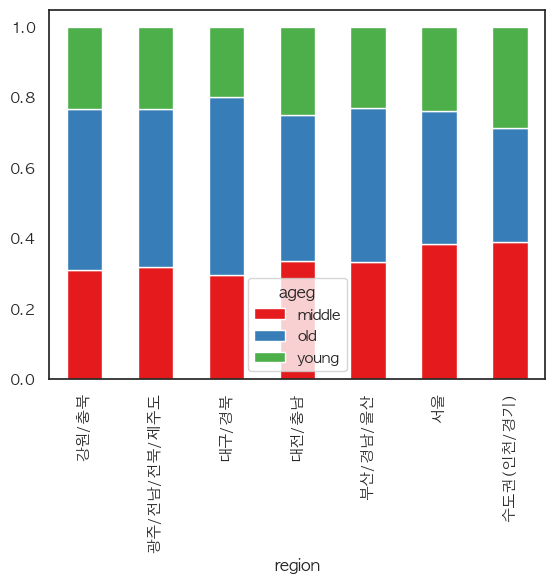

In [315]:
# df.plot.bar()를 통해 막대 그래프를 그린 후, stacked = True를 지정하면 누적 막대 그래프를 표현할 수 있다.
pivot_df.plot.bar(stacked = True)

# 아래 그래프를 보면 누적 막대 그래프로 만들었지만 세로 막대 그래프로 만들어져 지역명이 x축에 있어서 보기 어렵다.

<Axes: ylabel='region'>

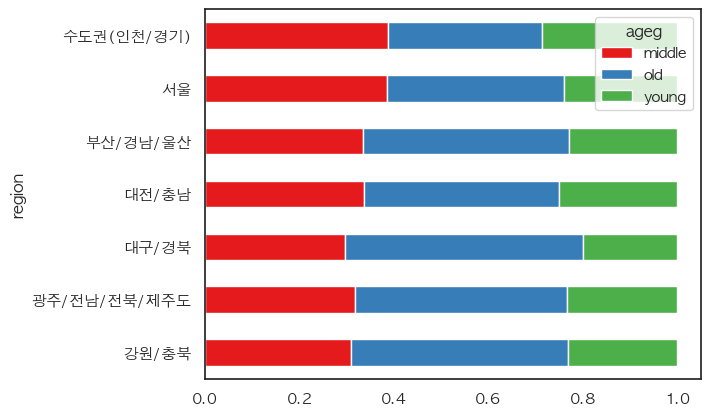

In [317]:
# 따라서 가로 막대 그래프를 그려야 하는데, 이때 df.plot.barh()를 이용하면 손쉽게 만들 수 있다.
# 참고로 h는 horizontal(수평의)를 뜻한다.

pivot_df.plot.barh(stacked = True)

In [318]:
# 다음으로, 막대 순서를 정렬해보자.
# 노년층 비율이 높은 순으로 막대 정렬하기: 현재는 지역명에 따라서 가나다순으로 정렬되어 있다.
# 그런데, 막대를 노년층 비율 내림차순으로 정렬하고자 하면 old를 기준으로 정렬하면 된다.
# 연령대 순으로 막대 색깔 나열하기: 현재는 middle, old, young 순서로 막대 색깔이 나열되어 있다.
# 그런데, 막대 색깔을 young, middle, old 순서로 나열하고자 하면 pivot_df의 변수 순서를 바꾸면 된다.

reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
# 먼저 노년층 비율로 정렬하고 pivot의 순서를 바꾼다.
# Step 1. pivot_df.sort_vlaues('old')
# Step 2. pivot_df.sort_vlaues('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),0.286815,0.388170,0.325015
서울,0.238761,0.385115,0.376124
대전/충남,0.250180,0.336449,0.413372
부산/경남/울산,0.228758,0.333742,0.437500
광주/전남/전북/제주도,0.232766,0.317924,0.449311
강원/충북,0.232190,0.308707,0.459103
대구/경북,0.199653,0.296296,0.504051


<Axes: xlabel='region'>

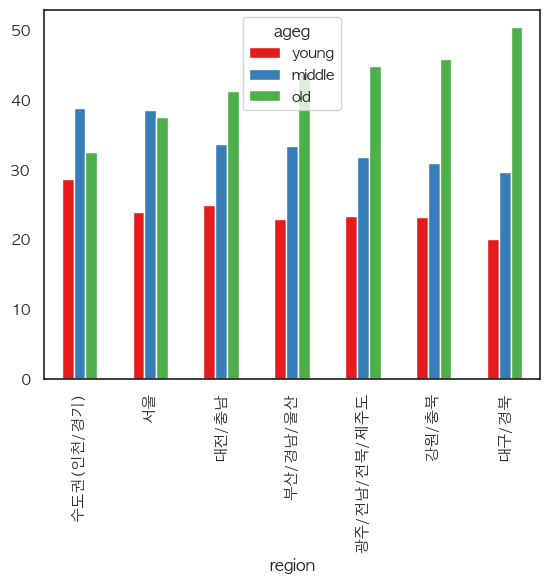

In [369]:
reorder_df.plot.bar() # 이 또한 세로 비율 막대 그래프로 나타내면 보기 어려워진다. 따라서 가로 누적 비율 막대 그래프로 표현하자.

<Axes: ylabel='region'>

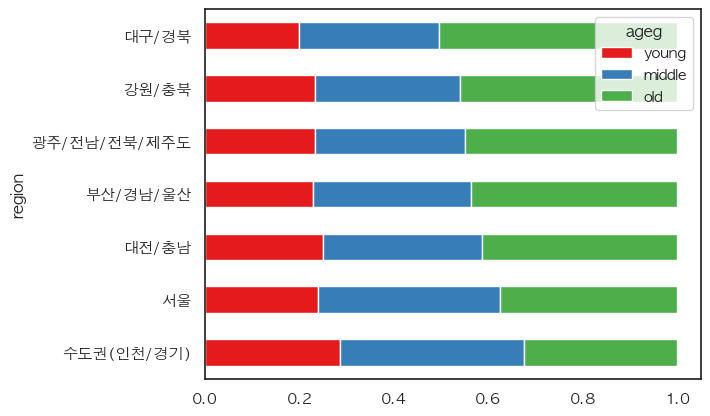

In [319]:
reorder_df.plot.barh(stacked = True)
# 결과 해석
# 대구/경북의 노년층 비율이 가장 높고, 그 뒤로는 강원/충북, 광주/전남/전북/제주도, 부산/경남/울산, ... 순서로 높다.